# Nivel 1

Conecta Python con MySQL Workbench y carga los datos de tu base de datos de Sprint 4 para utilizarlos en todos los ejercicios.

1. Conecta Python con MySQL Workbench y carga los datos de tu base de datos de Sprint 4 para utilizarlos en todos los ejercicios.

2. Para cada elemento, crea una vista adecuada según las variables especificadas. Interpreta los resultados según sus datos.

Recuerda: cuando selecciones las columnas, piensa siempre en el método que vas a utilizar e incluye las necesarias para la función de visualización que quieras utilizar.

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import pymysql

# Conexión a MySQL
connection = pymysql.connect(
    host="localhost",
    user="root",
    password="Barcelona25.",
    database="companies_transactions"
)

# Obtener lista de tablas
tablas = pd.read_sql("SHOW TABLES", connection).iloc[:,0].tolist()

# Cargar todas las tablas en un diccionario
df = {tabla: pd.read_sql(f"SELECT * FROM {tabla}", connection) 
      for tabla in tablas}

# Extraer cada DataFrame
df_companies = df['companies']
df_credit_card_status = df['credit_card_status']
df_credit_card = df['credit_cards']
df_products = df['products']
df_product_transaction = df['products_transactions']
df_transactions = df['transactions']
df_users = df['users']

C:\Users\GCCM_\AppData\Local\Temp\ipykernel_27840\2103921609.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tablas = pd.read_sql("SHOW TABLES", connection).iloc[:,0].tolist()
C:\Users\GCCM_\AppData\Local\Temp\ipykernel_27840\2103921609.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = {tabla: pd.read_sql(f"SELECT * FROM {tabla}", connection)


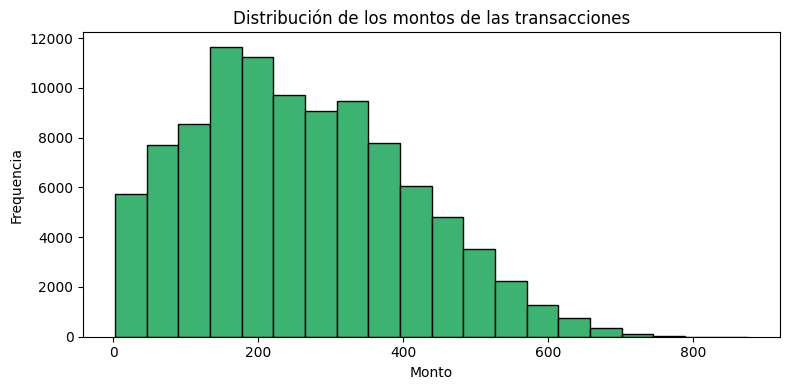

<Figure size 640x480 with 0 Axes>

In [3]:
# Una variable numérica.

plt.figure(figsize=(8,4)) 
plt.hist(df_transactions['amount'], bins=20, color="mediumseagreen", edgecolor="black") 
plt.title('Distribución de los montos de las transacciones') 
plt.xlabel('Monto')
plt.ylabel('Frequencia')
plt.tight_layout() 
plt.show() 
plt.clf()

El eje X representa los importes de las transacciones y el eje Y muestra cuántas operaciones caen dentro de cada rango. La distribución está claramente sesgada hacia la derecha: la mayoría de las transacciones corresponden a importes bajos e intermedios, con un pico alrededor de los 150–200. A medida que el monto aumenta, la frecuencia disminuye de forma progresiva, lo que indica que los valores altos son poco frecuentes y generan una cola extendida hacia la derecha. En conjunto, esto refleja que los importes moderados representan la mayor parte del volumen total.

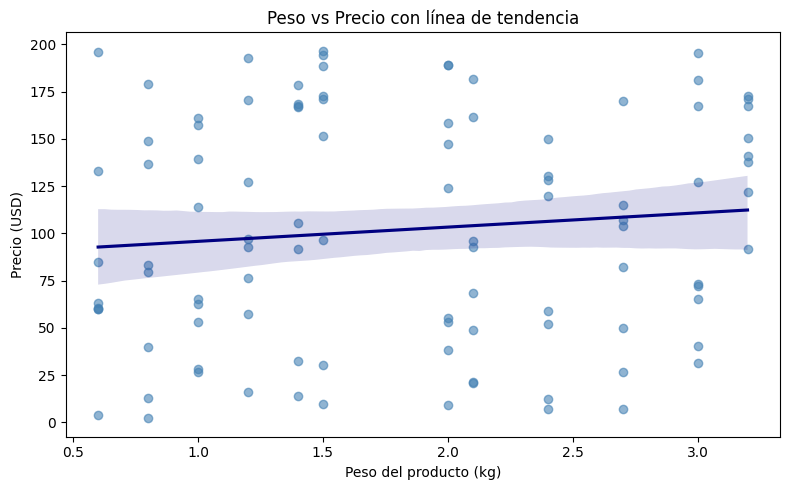

In [4]:
# Dos variables numéricas.

df_products['price'] = df_products['price'].str.replace('$','',regex=False) # Quita el símbolo $ del precio
df_products['price'] = pd.to_numeric(df_products['price'], errors='coerce') # Convierte precio a numérico

df_products['weight'] = pd.to_numeric(df_products['weight'], errors='coerce') # Convierte peso a numérico

plt.figure(figsize=(8,5))
sns.regplot( data=df_products, x='weight', y='price', scatter_kws={'alpha':0.6, 'color':'steelblue'}, line_kws={'color':'navy'})
plt.title('Peso vs Precio con línea de tendencia')
plt.xlabel('Peso del producto (kg)') 
plt.ylabel('Precio (USD)')
plt.tight_layout()
plt.show()

El gráfico muestra una relación positiva débil entre peso y precio: a medida que el peso aumenta, el precio tiende a subir ligeramente. La línea de tendencia confirma esta relación ascendente, aunque la dispersión de los puntos indica que la relación es limitada y presenta mucha variabilidad. Esto sugiere que el peso influye en el precio, pero no es un factor determinante por sí solo, ya que productos con pesos similares pueden tener precios muy distintos.

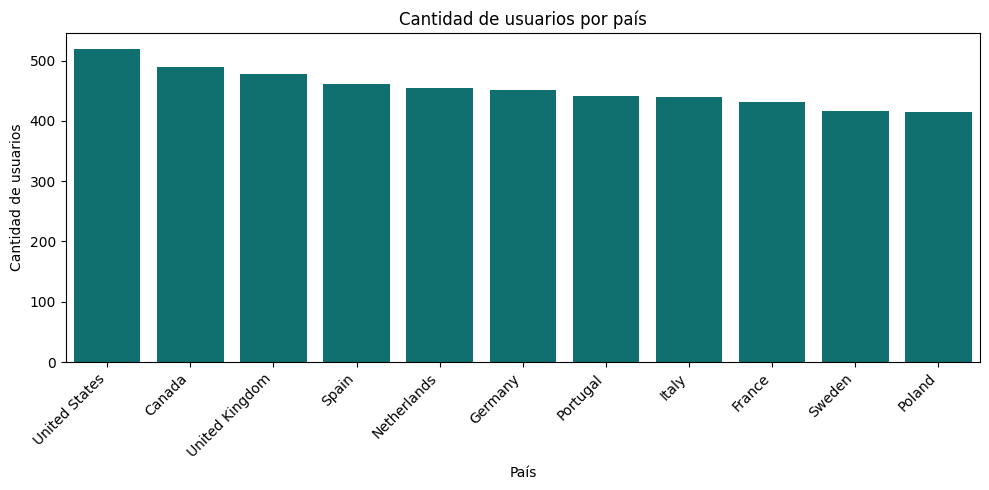

<Figure size 640x480 with 0 Axes>

In [8]:
# Una variable categórica.

# Crear el orden según la cantidad de usuarios por país
orden = df_users['country'].value_counts().index

plt.figure(figsize=(10,5))
sns.countplot(data=df_users, x='country', order=orden, color='teal')
plt.title('Cantidad de usuarios por país')
plt.xlabel('País')
plt.ylabel('Cantidad de usuarios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.clf()


El gráfico muestra que la mayoría de los usuarios provienen de Estados Unidos, seguido por Canadá y Reino Unido, mientras que el resto de países presentan cantidades menores. La distribución es desigual, con una clara concentración de usuarios en unos pocos mercados. El resto de países muestra cifras más equilibradas entre sí, siendo Polonia el que presenta el menor volumen. Esta distribución permite identificar dónde se concentra la mayor base de usuarios y qué regiones podrían representar oportunidades de crecimiento.

Index(['id_x', 'card_id', 'business_id', 'timestamp', 'amount', 'declined',
       'product_ids', 'user_id', 'lat', 'longitude', 'id_y', 'name', 'surname',
       'phone', 'email', 'birth_date', 'country', 'city', 'postal_code',
       'address'],
      dtype='object')
0    4713
1     438
2    2118
Name: id_y, dtype: int64


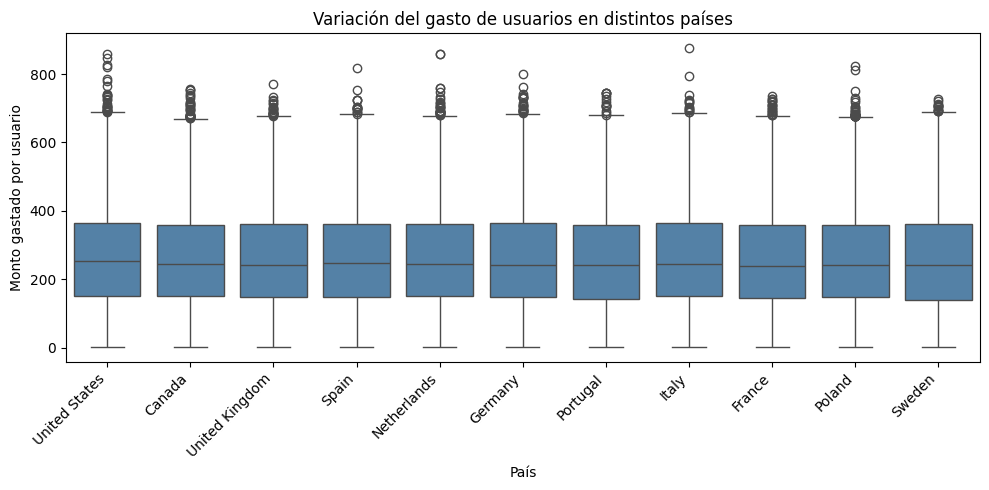

<Figure size 640x480 with 0 Axes>

In [ ]:
# Una variable categórica y una numérica.

df = df_transactions.merge(df_users, left_on='user_id', right_on='id')              # Une transacciones con usuarios
print(df.columns)                                                                   # Elimina columna duplicada
print(df['id_y'].head(3))
df = df.drop(columns=['id_y']) 

orden = df.groupby('country')['amount'].sum().sort_values(ascending=False).index    # Ordena países por gasto total

plt.figure(figsize=(10,5))
sns.boxplot(x='country', y='amount',data=df,order=orden, color='steelblue')
plt.title('Variación del gasto de usuarios en distintos países')
plt.xlabel('País')
plt.ylabel('Monto gastado por usuario')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.clf()

El gráfico muestra que la mayoría de países tienen patrones de gasto muy parecidos y generalmente bajos, mientras que solo unos pocos usuarios presentan montos excepcionalmente altos. Estos valores extremos suelen deberse a compras puntuales de alto valor o promociones específicas. Aunque llaman la atención, no cambian la tendencia general de gasto moderado en cada país.

Index(['id_x', 'card_id', 'business_id', 'timestamp', 'amount', 'declined',
       'product_ids', 'user_id', 'lat', 'longitude', 'amount_group', 'id_y',
       'name', 'surname', 'phone', 'email', 'birth_date', 'country', 'city',
       'postal_code', 'address'],
      dtype='object')
0    4713
1     438
2    2118
Name: id_y, dtype: int64


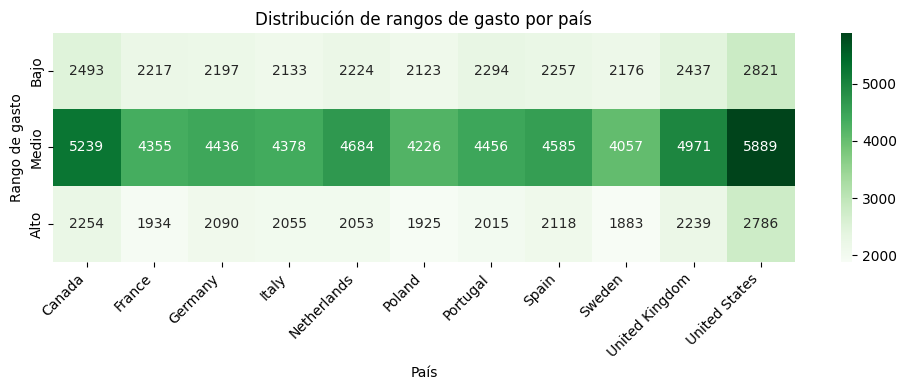

<Figure size 640x480 with 0 Axes>

In [11]:
# Dos variables categóricas.

# Creamos una nueva variable categórica llamada 'amount_group'
df_transactions['amount_group'] = pd.cut(
    df_transactions['amount'],                                          # Columna numérica que queremos agrupar
    bins=[0, 150, 370, 880],                                            # Rangos definidos
    labels=['Bajo', 'Medio', 'Alto']                                    # Etiquetas de los rangos
)

df = df_transactions.merge(df_users, left_on='user_id', right_on='id') # Une transacciones con usuarios
print(df.columns)
print(df['id_y'].head(3))
df = df.drop(columns=['id_y'])                                        # Elimina columna duplicada

# Genera una tabla de frecuencias cruzando rango de gasto con país
tabla = pd.crosstab(df['amount_group'], df['country'])                # Tabla de frecuencias cruzadas

plt.figure(figsize=(10,4))
sns.heatmap(tabla, annot=True, cmap='Greens',fmt='d')
plt.title('Distribución de rangos de gasto por país')
plt.xlabel('País')
plt.ylabel('Rango de gasto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.clf()

La mayoría de las transacciones se concentran en el rango de gasto Medio (150–370), que representa más del 50% del total. Los rangos Bajo y Alto muestran volúmenes similares entre sí, pero significativamente menores. Esta distribución explica por qué el heatmap destaca con mayor intensidad la categoría Media en todos los países.

Index(['id_x', 'card_id', 'business_id', 'timestamp', 'amount', 'declined',
       'product_ids', 'user_id', 'lat', 'longitude', 'amount_group', 'id_y',
       'name', 'surname', 'phone', 'email', 'birth_date', 'country', 'city',
       'postal_code', 'address', 'product_id', 'transaction_id', 'id',
       'product_name', 'price', 'colour', 'weight', 'warehouse_id'],
      dtype='object')


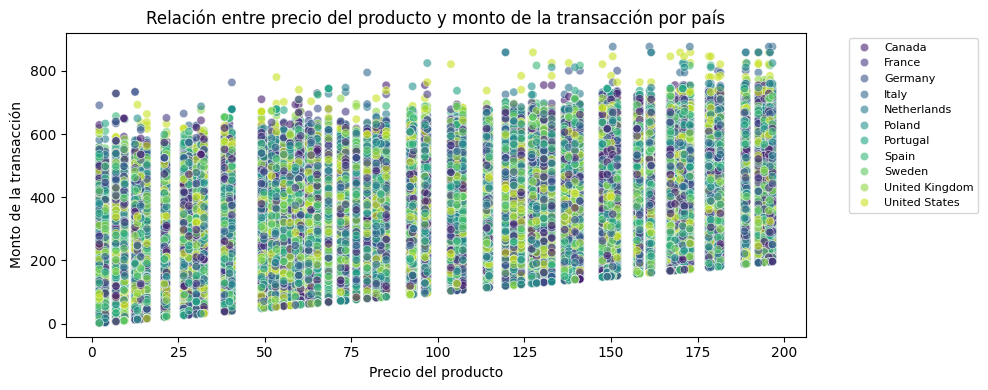

<Figure size 640x480 with 0 Axes>

In [ ]:
# Tres variables combinadas.

df_merged = (
        df_transactions
        .merge(df_users, left_on='user_id', right_on='id')
        .merge(df_product_transaction,left_on='id_x',right_on='transaction_id')
        .merge(df_products,left_on='product_id',right_on='id'))
print(df_merged.columns)
df_merged[['id_y','id_x','id','transaction_id','product_id','user_id']].head(3)
df_merged = df_merged.drop(columns=['id_y','id_x','id'])                                    # Elimina columna duplicada


plt.figure(figsize=(10, 4))
sns.scatterplot(
    data=df_merged,
    x='price',
    y='amount',
    hue='country',
    hue_order=sorted(df_merged['country'].unique()),
    palette='viridis',
    alpha=0.6
)
plt.title('Relación entre precio del producto y monto de la transacción por país')
plt.xlabel('Precio del producto')
plt.ylabel('Monto de la transacción')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=8)
plt.tight_layout()
plt.show()
plt.clf()



Las transacciones se distribuyen de forma muy dispersa en todos los países, mostrando que el monto final no depende del precio del producto sino de la cantidad comprada en cada operación. Aunque los países se diferencian por color, no aparecen patrones específicos por región: todos presentan una variabilidad similar. En conjunto, el gráfico indica que el precio del producto no predice el monto de la transacción. Los puntos más alejados del grupo principal representan compras poco frecuentes, pero no modifican la tendencia general.

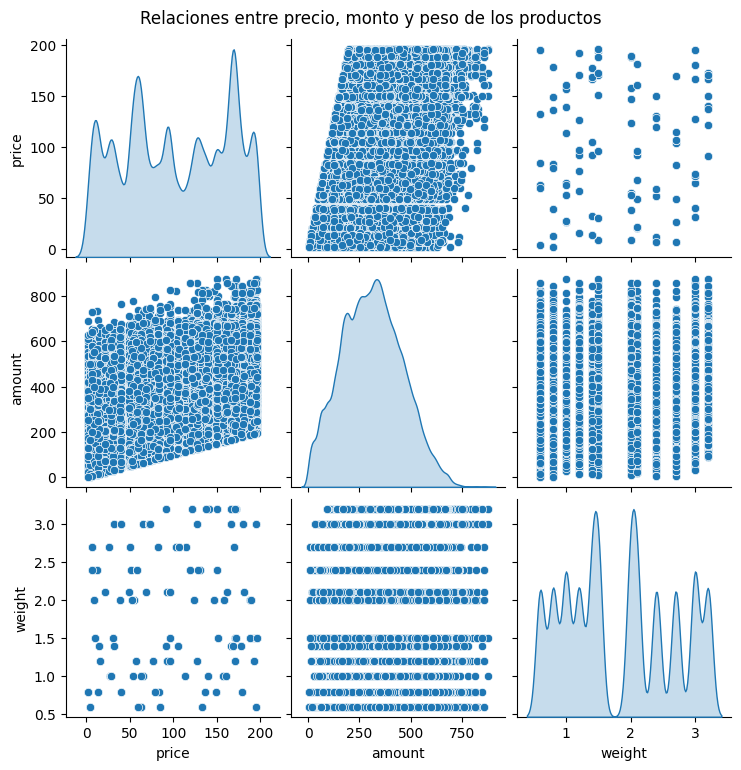

In [22]:
g = sns.pairplot(
    df_merged, 
    vars=['price', 'amount', 'weight'], 
    diag_kind='kde')  # Crea el pairplot con distribuciones KDE

g.fig.suptitle('Relaciones entre precio, monto y peso de los productos', y=1.02)   # Añade un título al pairplot
plt.show()                                                                         # Muestra el gráfico


El pairplot muestra que price y amount son las únicas variables con una relación clara, evidenciando una tendencia positiva donde productos más caros generan montos de transacción más altos. Las distribuciones de price y weight son discretas y reflejan valores estandarizados, mientras que amount presenta una mayor dispersión, aunque predominan las transacciones de bajo monto. En cuanto a weight, no se observan patrones definidos ni influencia sobre el precio o el monto, por lo que su aporte explicativo dentro del análisis es limitado.

# Nivel 2

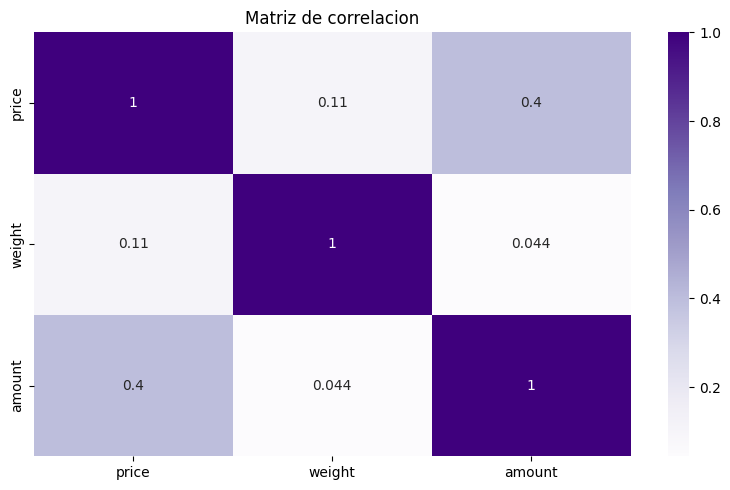

<Figure size 640x480 with 0 Axes>

In [25]:
# 1. Representa la correlación de algunas variables e interpreta los resultados según tus datos.

df_corr = df_merged[['price', 'weight', 'amount']]
matriz = df_corr.corr()


plt.figure(figsize=(8,5))
sns.heatmap(matriz, annot=True,cmap='Purples')
plt.title('Matriz de correlacion')
plt.tight_layout()
plt.show()
plt.clf()

La matriz de correlación muestra que el peso presenta una relación positiva muy débil con el precio, lo que indica que los productos ligeramente más pesados tienden a tener precios apenas superiores, aunque esta asociación es mínima. Sin embargo, el peso no guarda relación con el monto de las transacciones. Por otro lado, el monto se relaciona principalmente con el precio, mientras que el peso no influye en él. En conjunto, el peso no aporta capacidad explicativa relevante dentro del análisis.

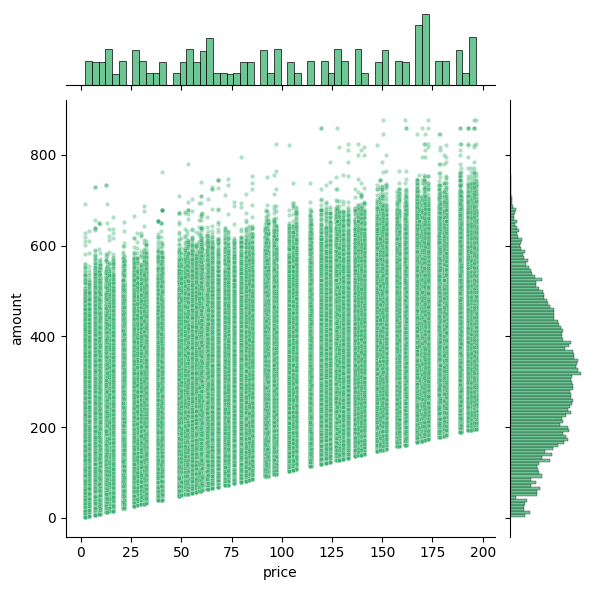

<Figure size 640x480 with 0 Axes>

In [37]:
# 2. Implementa un Jointplot para explorar la relación entre dos variables e interpreta los resultados según tus datos.

sns.jointplot(
    data=df_merged,
    x='price',
    y='amount',
    kind='scatter',
    height=6,
    color='mediumseagreen',
    joint_kws={'s': 10, 'alpha': 0.4}
)

plt.show()
plt.clf()

El jointplot muestra una relación positiva entre el precio del producto y el monto total de la transacción: en general, a mayor precio, mayor suele ser el monto. Sin embargo, la nube de puntos presenta una dispersión vertical considerable, lo que indica que un mismo precio puede generar montos finales distintos según lo que compre cada cliente, ya sea por diferencias en la cantidad adquirida o por la combinación de varios productos en una misma compra. Además, los puntos más alejados del grupo principal representan transacciones menos frecuentes, como compras de gran volumen o productos de precio elevado que se venden pocas veces. En conjunto, el gráfico refleja una tendencia creciente, pero con una variabilidad importante en el comportamiento de las transacciones.

# Nivel 3

1. Transfiere todas las visualizaciones del Nivel 1 a Power BI utilizando scripts de Python.

Recuerda: al cargar tus dataframes en Power BI, asegúrate de incluir una columna identificadora o una combinación de columnas que garantice la unicidad de cada registro. Por defecto, Power BI elimina duplicados y podrías perder información.

In [ ]:
# Cargo los dataframes uno a uno en power bi con los siguientes scripts
# companies
import pandas as pd
import pymysql

connection = pymysql.connect(
    host="localhost",
    user="root",
    password=".",
    database="companies_transactions"
)

df = pd.read_sql("SELECT * FROM companies", connection)

# Columna única para evitar que Power BI elimine duplicados
df["id_unique"] = df.index

# credit_card_status
import pandas as pd
import pymysql

connection = pymysql.connect(
    host="localhost",
    user="root",
    password="Barcelona25.",
    database="companies_transactions"
)

df = pd.read_sql("SELECT * FROM credit_card_status", connection)

# Columna única para evitar que Power BI elimine duplicados
df["id_unique"] = df.index

# credit_cards
import pandas as pd
import pymysql

connection = pymysql.connect(
    host="localhost",
    user="root",
    password="Barcelona25.",
    database="companies_transactions"
)

df = pd.read_sql("SELECT * FROM credit_cards", connection)

# Columna única para evitar que Power BI elimine duplicados
df["id_unique"] = df.index

# products
import pandas as pd
import pymysql

connection = pymysql.connect(
    host="localhost",
    user="root",
    password="Barcelona25.",
    database="companies_transactions"
)

df = pd.read_sql("SELECT * FROM products", connection)

# Columna única para evitar que Power BI elimine duplicados
df["id_unique"] = df.index

# products_transactions
import pandas as pd
import pymysql

connection = pymysql.connect(
    host="localhost",
    user="root",
    password="Barcelona25.",
    database="companies_transactions"
)

df = pd.read_sql("SELECT * FROM products_transactions", connection)

# Columna única para evitar que Power BI elimine duplicados
df["id_unique"] = df.index

# transactions
import pandas as pd
import pymysql

connection = pymysql.connect(
    host="localhost",
    user="root",
    password="Barcelona25.",
    database="companies_transactions"
)

df = pd.read_sql("SELECT * FROM transactions", connection)

# Columna única para evitar que Power BI elimine duplicados
df["id_unique"] = df.index

# users
import pandas as pd
import pymysql

connection = pymysql.connect(
    host="localhost",
    user="root",
    password="Barcelona25.",
    database="companies_transactions"
)

df = pd.read_sql("SELECT * FROM users", connection)

# Columna única para evitar que Power BI elimine duplicados
df["id_unique"] = df.index